In [1]:
import os
from typing import Union
import urllib.request

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(image: Union[str, np.ndarray]) -> None:
    if isinstance(image, str):
        image = cv2.imread(image)
    if len(image.shape) < 3:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    assert len(image.shape) == 3
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def save_image(image: np.ndarray, file_name: str) -> None:
    cv2.imwrite(file_name, image)
    print('Image saved as %s' % file_name)

In [3]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/f/f3/Soochow_Planisphere_%28Detail_2%29.jpg'
extension = os.path.splitext(image_url)[1]
assert len(extension) != 0
image_file = 'soochow' + extension

urllib.request.urlretrieve(image_url, image_file)
print('Downloaded image as %s' % image_file)

Downloaded image as soochow.jpg


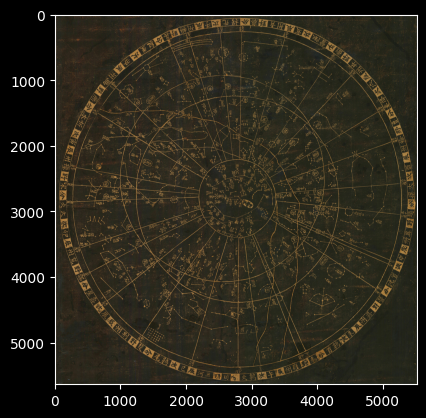

In [4]:
show_image(image_file)

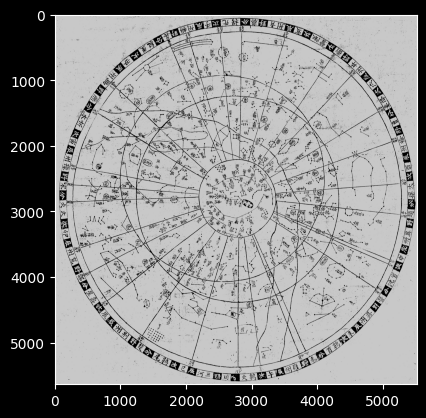

Image saved as thresh.jpg


In [5]:
image = cv2.imread(image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold = 80
max_value = 200

ret, thresh = cv2.threshold(gray, threshold, max_value, 
                            cv2.THRESH_BINARY_INV)
show_image(thresh)
save_image(thresh, 'thresh.jpg')

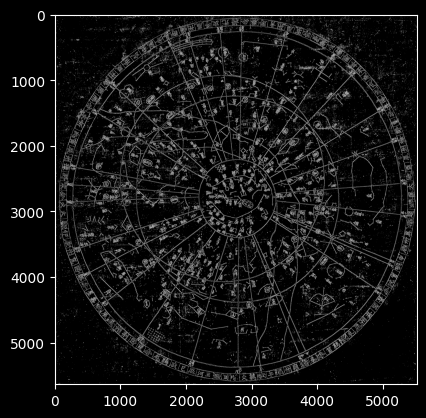

Image saved as sobel.jpg


In [6]:
ddepth = cv2.CV_16S
scale = 1
delta = 0

blurred = cv2.GaussianBlur(thresh, (3, 3), 0)
grad_x = cv2.Sobel(blurred, ddepth, 1, 0, ksize=3, scale=scale, 
                   delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(blurred, ddepth, 0, 1, ksize=3, scale=scale,
                   delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

show_image(grad)
save_image(cv2.bitwise_not(grad), 'sobel.jpg')